In [1]:
#import libraries
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
#load results data
results = pd.read_csv('mystats_hour.csv',parse_dates=True).set_index('date')

In [3]:
#select resutls with 264 period
results = results[results.period==264]
results['log_port_val']=np.log(results.portfolio)

In [4]:
#get daily and monthly dates from index
results['Daily']=pd.to_datetime(results.reset_index().date).dt.floor(freq='D').values
results['Month']=pd.to_datetime(results.reset_index().date).dt.to_period('M').dt.to_timestamp().values

In [5]:
#calcualte log returns
results['returns']=results\
.log_port_val\
.diff()\
.fillna(0)

In [6]:
# assuming no risk free rate of return
print('Annual Sharpe Ratio: ',np.round(results['returns']\
                                       .mean()/results['returns'].std()*np.sqrt(24*365),2))
print('Annual Return: {}%'.format(np.round(np.exp(results['returns']\
                                       .mean()*24*365-1)*100,2)))
print('Annual Volatility: {}%'.format(np.round(results['returns']\
                                       .std()*np.sqrt(24*365)*100,2)))
print('Portfolio Return from 2019-12-09 to 2020-10-19: {}%'\
      .format(np.round((np.exp(results['returns'].mean()*7555)-1)*100,2)))
print('Monthly Return: {}%'.format(np.round((np.exp(results['returns'].mean()*24*30)-1)*100,2)))
print('Monthly Volatility: {}%'.format(np.round(results['returns']\
                                       .std()*np.sqrt(24*30)*100,2)))
print('Starting Cash: $10,000')
print('Final Cash: $19,455.73')

Annual Sharpe Ratio:  2.54
Annual Return: 79.59%
Annual Volatility: 30.33%
Portfolio Return from 2019-12-09 to 2020-10-19: 94.56%
Monthly Return: 6.55%
Monthly Volatility: 8.7%
Starting Cash: $10,000
Final Cash: $19,455.73


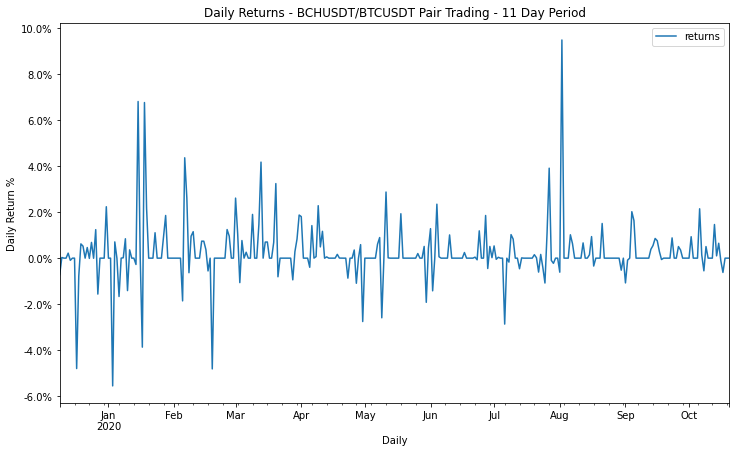

In [7]:
# daily returns
import matplotlib.ticker as mtick
from functools import reduce
returns = lambda x: 0 if pd.isnull(np.exp(x.mean()*x.count())-1) else np.exp(x.mean()*x.count())-1
volatility = lambda x: 0 if pd.isnull(x.std()*np.sqrt(x.count())) else x.std()*np.sqrt(x.count())

ax = (results\
.groupby('Daily')\
.agg({'returns': returns})*100)\
.plot(figsize=(12,7),
     title='Daily Returns - BCHUSDT/BTCUSDT Pair Trading - 11 Day Period',
     ylabel='Daily Return %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

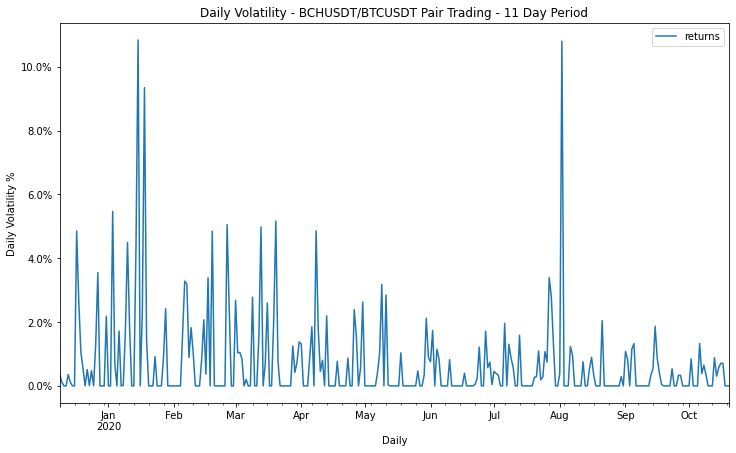

In [8]:
#daily volatility
ax = (results\
.groupby('Daily')\
.agg({'returns': volatility})*100)\
.plot(figsize=(12,7),
     title='Daily Volatility - BCHUSDT/BTCUSDT Pair Trading - 11 Day Period',
     ylabel='Daily Volatility %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

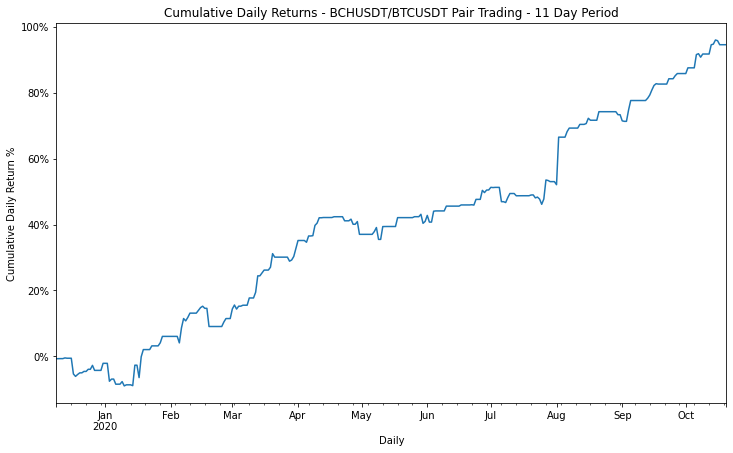

In [9]:
# cumulative daily returns
ax = ((np.exp(results\
.groupby('Daily')['returns']\
.sum().cumsum())-1)*100)\
.plot(figsize=(12,7),
     title='Cumulative Daily Returns - BCHUSDT/BTCUSDT Pair Trading - 11 Day Period',
     ylabel='Cumulative Daily Return %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

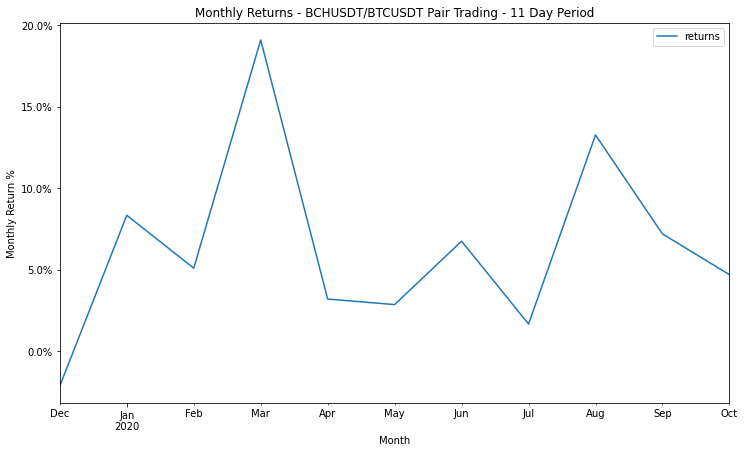

In [10]:
#monthly returns
ax = (results\
.groupby('Month')\
.agg({'returns': returns})*100)\
.plot(figsize=(12,7),
     title='Monthly Returns - BCHUSDT/BTCUSDT Pair Trading - 11 Day Period',
     ylabel='Monthly Return %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

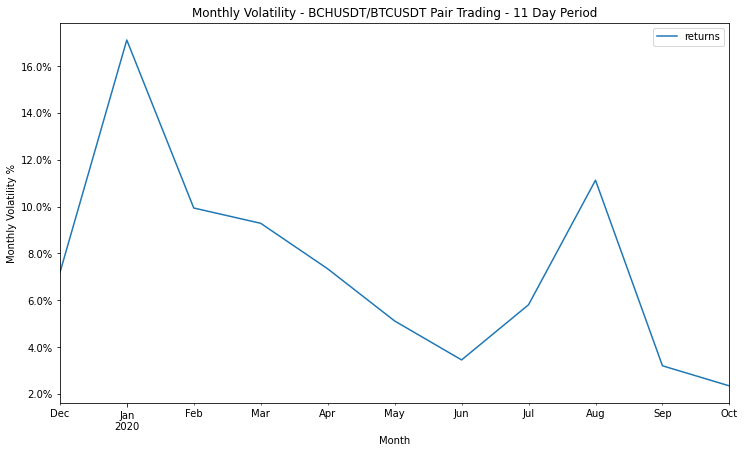

In [11]:
# monthly volatility
ax = (results\
.groupby('Month')\
.agg({'returns': volatility})*100)\
.plot(figsize=(12,7),
     title='Monthly Volatility - BCHUSDT/BTCUSDT Pair Trading - 11 Day Period',
     ylabel='Monthly Volatility %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

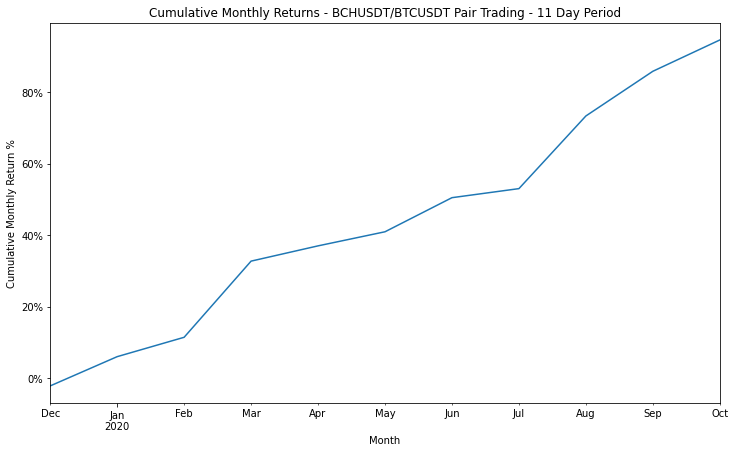

In [12]:
#cumulative monthly returns
ax = ((np.exp(results\
.groupby('Month')['returns']\
.sum().cumsum())-1)*100)\
.plot(figsize=(12,7),
     title='Cumulative Monthly Returns - BCHUSDT/BTCUSDT Pair Trading - 11 Day Period',
     ylabel='Cumulative Monthly Return %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
